# Pritvhi Poddar (17191)

## This report is also available as an .ipynb file in this same working directory

# Part 1

## Binary Classification

First, we choose the classes 1 and 2. We will first run selection of kernels on all the 25 features. Once we have decided the kernel, we will run the classifier for just 10 features to compare the performance.

Starting with 25 features and running the kernel selection process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
def get_accuracy(conf_mat):
    total = np.sum(conf_mat)
    tp = 0
    for i in range(len(conf_mat)):
        tp = tp+conf_mat[i][i]
        
    accuracy = tp/total
    return accuracy

In [16]:
data = pd.read_csv('17191.csv').to_numpy()

""" running classification between classes 1 and 2"""

new_data=[]
for i in range(len(data)):
    if data[i][25] == 1 or data[i][25] == 2:
        new_data.append(data[i])
new_data = np.array(new_data)

print(len(new_data))

634


In [17]:
x = new_data[:,:-1]
y = new_data[:,-1:]

x_train = x[0:500,:]
x_test = x[500:,:]
y_train = y[0:500,:]
y_train = y_train.reshape(len(y_train))
y_test = y[500:,:]
y_test = y_test.reshape(len(y_test))

In [18]:
clf = svm.SVC(gamma = 0.001, C = 100, kernel = 'rbf')
clf.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred = clf.predict(x_test)

metrics = confusion_matrix(y_test, y_pred)
accuracy = get_accuracy(metrics)
print('accuracy: ',accuracy)

accuracy:  0.9925373134328358


We see that the accuracy is very high for the rbf kernel. This might be vecause of the reltively small amount of data to train on. Now we proceed with testing the the other kernels.

In [20]:
kernels = ['poly', 'rbf', 'sigmoid']
accuracies=[]
for kernel in kernels:
    clf = svm.SVC(gamma = 0.001, C = 100, kernel = kernel)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    metrics = confusion_matrix(y_test, y_pred)
    accuracies.append(get_accuracy(metrics))
    
result={'kernel':kernels, 'accuracy':accuracies}
df = pd.DataFrame(result)
df

,kernel,accuracy
0,poly,0.992537
1,rbf,0.992537
2,sigmoid,0.992537


We see that for a given gamma, we get the same accuracy with different kernels. So let's choose the rbf kernel and proceed with hyper parameter tunning on gamma

In [38]:
gammas = np.arange(0.001,10,0.1)

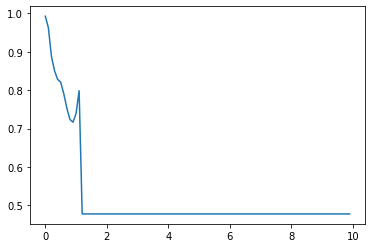

In [40]:
accuracies = []
for gamma in gammas:
    clf = svm.SVC(gamma = gamma, C = 100, kernel = 'rbf')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    metrics = confusion_matrix(y_test, y_pred)
    accuracies.append(get_accuracy(metrics))
    
plt.plot(gammas, accuracies)

Clearly the smaller the gamma, the better. So we stick to gamma = 0.001

### Now we proceed with testing on just 10 features

In [21]:
x_10 = new_data[:,:10]
y = new_data[:,-1:]
x_train_10 = x_10[0:500,:]
x_test_10 = x_10[500:,:]
y_train = y[0:500,:]
y_train = y_train.reshape(len(y_train))
y_test = y[500:,:]
y_test = y_test.reshape(len(y_test))

In [22]:
clf = svm.SVC(gamma = 0.001, C = 100, kernel = 'rbf')
clf.fit(x_train_10,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
y_pred = clf.predict(x_test_10)

metrics = confusion_matrix(y_test, y_pred)
accuracy_10 = get_accuracy(metrics)

print('accuracy against 10 features: ',accuracy_10)

accuracy against 10 features:  0.9850746268656716


We see that there is a slight drop in the accuracy when the number of features were reduced

### Accuracy for pair of classes 1 and 2 is 0.992537

Lets now examine other pairs of classes

In [45]:
data = pd.read_csv('17191.csv').to_numpy()

In [46]:
""" running classification between classes 3 and 4"""

new_data=[]
for i in range(len(data)):
    if data[i][25] == 3 or data[i][25] == 4:
        new_data.append(data[i])
new_data = np.array(new_data)

print(len(new_data))

607


In [47]:
x = new_data[:,:-1]
y = new_data[:,-1:]

x_train = x[0:500,:]
x_test = x[500:,:]
y_train = y[0:500,:]
y_train = y_train.reshape(len(y_train))
y_test = y[500:,:]
y_test = y_test.reshape(len(y_test))

In [48]:
clf = svm.SVC(gamma = 0.001, C = 100, kernel = 'rbf')
clf.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
y_pred = clf.predict(x_test)

metrics = confusion_matrix(y_test, y_pred)
accuracy = get_accuracy(metrics)
print('accuracy: ',accuracy)

accuracy:  0.9719626168224299


### Accuracy for pair of classes 3 and 4 is 0.971962

Checking for classes 5 and 6

In [50]:
""" running classification between classes 5 and 6"""

new_data=[]
for i in range(len(data)):
    if data[i][25] == 5 or data[i][25] == 6:
        new_data.append(data[i])
new_data = np.array(new_data)

print(len(new_data))

576


In [51]:
x = new_data[:,:-1]
y = new_data[:,-1:]

x_train = x[0:500,:]
x_test = x[500:,:]
y_train = y[0:500,:]
y_train = y_train.reshape(len(y_train))
y_test = y[500:,:]
y_test = y_test.reshape(len(y_test))

In [52]:
clf = svm.SVC(gamma = 0.001, C = 100, kernel = 'rbf')
clf.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
y_pred = clf.predict(x_test)

metrics = confusion_matrix(y_test, y_pred)
accuracy = get_accuracy(metrics)
print('accuracy: ',accuracy)

accuracy:  0.9736842105263158


### Accuracy for pair of classes 5 and 6 is 0.973684

### Hence we see that with different pairs, we have different accuracies. Since for all the pairs, we trained on 500 training samples, we can safely say that this differences is occuring due to the class imbalance probelm wherein we don't have the same number of occurences of each class label

## Multiclass Classification

Now we perform the classification using all the 10 class labels

We will first perform the kernel selections and hyper-parameter tuning and then check what impact does it have if we only train on the first 10 features rather than the whole 25 features

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [31]:
def get_accuracy(conf_mat):
    total = np.sum(conf_mat)
    tp = 0
    for i in range(len(conf_mat)):
        tp = tp+conf_mat[i][i]
        
    accuracy = tp/total
    return accuracy

In [32]:
data = pd.read_csv('17191.csv').to_numpy()

In [33]:
x = data[:,:-1]
y = data[:,-1:]

In [34]:
x_train = x[0:2500,:]
x_test = x[2500:,:]
y_train = y[0:2500,:]
y_train = y_train.reshape(len(y_train))
y_test = y[2500:,:]
y_test = y_test.reshape(len(y_test))

In [29]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracies=[]
for kernel in kernels:
    clf = svm.SVC(gamma = 0.001, C = 100, kernel = kernel)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    metrics = confusion_matrix(y_test, y_pred)
    accuracies.append(get_accuracy(metrics))
    
result={'kernel':kernels, 'accuracy':accuracies}
df = pd.DataFrame(result)
df

,kernel,accuracy
0,linear,0.838
1,rbf,0.892
2,poly,0.884
3,sigmoid,0.822


We find that rbf gives the best results. So now lets run parameter tuning on gamma values

In [9]:
gammas = np.arange(0.001,10,0.1)

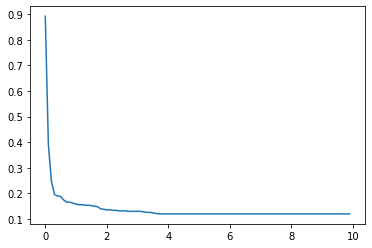

In [10]:
accuracies = []
for gamma in gammas:
    clf = svm.SVC(gamma = gamma, C = 100, kernel = 'rbf')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    metrics = confusion_matrix(y_test, y_pred)
    accuracies.append(get_accuracy(metrics))
    
plt.plot(gammas, accuracies)

So we see that gamma = 0.001 is the best

Therefore prediction with kernel = rbf and gamma = 0.001

In [36]:
clf = svm.SVC(gamma = 0.001 , C = 100, kernel = 'rbf')
clf.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred = clf.predict(x_test)
metrics = confusion_matrix(y_test, y_pred)
accuracy = get_accuracy(metrics)
print('accuracy:', accuracy)

accuracy: 0.892


### Thus the accuracy with all features available, is 0.892

## Training on only 10 features

In [40]:
x_10 = data[:,:10]
y = data[:,-1:]
x_train_10 = x_10[0:2500,:]
x_test_10 = x_10[2500:,:]
y_train = y[0:2500,:]
y_train = y_train.reshape(len(y_train))
y_test = y[2500:,:]
y_test = y_test.reshape(len(y_test))

In [41]:
clf = svm.SVC(gamma = 0.001 , C = 100, kernel = 'rbf')
clf.fit(x_train_10, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred = clf.predict(x_test_10)
metrics = confusion_matrix(y_test, y_pred)
accuracy = get_accuracy(metrics)
print('accuracy:', accuracy)

accuracy: 0.86


### Here we see that there is a drop in accuracy because of less number of features available for training the model

# Part 2- Kaggle dataset

The data set has been saved in the same working directory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.metrics import confusion_matrix
%matplotlib inline

/home/prithvi/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/prithvi/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
def get_accuracy(conf_mat):
    total = np.sum(conf_mat)
    tp = 0
    for i in range(len(conf_mat)):
        tp = tp+conf_mat[i][i]
        
    accuracy = tp/total
    return accuracy

In [3]:
data = pd.read_csv('train_set.csv', header=None).to_numpy()
x = data[:,:-1]
y = data[:,-1:]

Splitting the trining data into 8000 training samples and 2000 testing samples

In [4]:
x_train = x[0:8000,:]
x_test = x[8000:,:]
y_train = y[0:8000,:]
y_train = y_train.reshape(8000)
y_test = y[8000:,:]
y_test = y_test.reshape(2000)

We will be solving the primal optimization problem as indicated in the documentation of scikit-learn. We solve the primal when number of samples > number of features. Solving the dual in this case fails to converge to a proper value.

In [5]:
clf = svm.LinearSVC(dual=False, C = 10, max_iter = 1000)
clf.fit(x_train, y_train)

LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Now, running the classifier on the test samples to get information about the accuracy of the model.

In [6]:
y_pred = clf.predict(x_test)

In [7]:
metrics = confusion_matrix(y_test, y_pred)
accuracy = get_accuracy(metrics)
print(accuracy)

0.868


We see that the accuracy of this model is 0.868 or 86.8% 

We can run hyper-parameter tuninig on the C value which is the regularization constant for the svm, ad see which one produces the best accuracy.

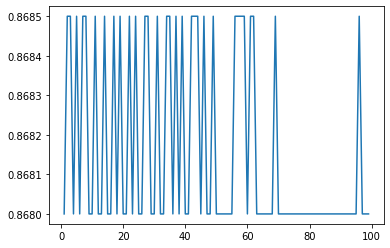

In [8]:
c = np.arange(1, 100, 1)
accuracy=[]
for i in c:
    clf = svm.LinearSVC(dual=False, C = i, max_iter = 1000)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    metrics = confusion_matrix(y_test, y_pred)
    accuracy.append(get_accuracy(metrics))
    
plt.plot(c, accuracy)

We can see that the accuracy doesn't vary much and bouncec between 86.8% and 86.85%. Thus we will use C = 10 for our final prediction

In [ ]:
clf = svm.LinearSVC(dual=False, C = 10, max_iter = 1000)
test = pd.read_csv('test_set.csv', header=None).to_numpy()
prediction = clf.predict(test)
ids = np.arange(0,len(prediction),1)
prediction_ = prediction.astype(int)
final = {'id':ids, 'class':prediction_}
df = pd.DataFrame(final)
df.to_csv (r'Prithvi_17191_prediction.csv', index = False, header=True)

# The prediction results as well as all the training and testing data is present in the working directory